In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('./framingham.csv')

In [111]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [112]:
from sklearn.impute import SimpleImputer

# Assuming your dfset is in a pandas dfFrame called 'df'

# Create instances of the SimpleImputer class with different strategies
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Columns for each imputation strategy
mean_columns = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']
median_columns = []
mode_columns = ['education', 'BPMeds']

# Apply mean imputation
df[mean_columns] = mean_imputer.fit_transform(df[mean_columns])

# Apply median imputation (if needed)
if len(median_columns) > 0:
    df[median_columns] = median_imputer.fit_transform(df[median_columns])

# Apply mode imputation
df[mode_columns] = mode_imputer.fit_transform(df[mode_columns])

# Check for NaN values in the imputed dfset
print("Contains NaN values after imputation:", df.isna().any().any())

Contains NaN values after imputation: False


In [113]:
#Arranging the columns to independent and dependent
X = df.drop('TenYearCHD', axis=1).values   # features
y = df['TenYearCHD'].values      

In [114]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.20, random_state=42)  

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
from sklearn.linear_model import LogisticRegression  
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)


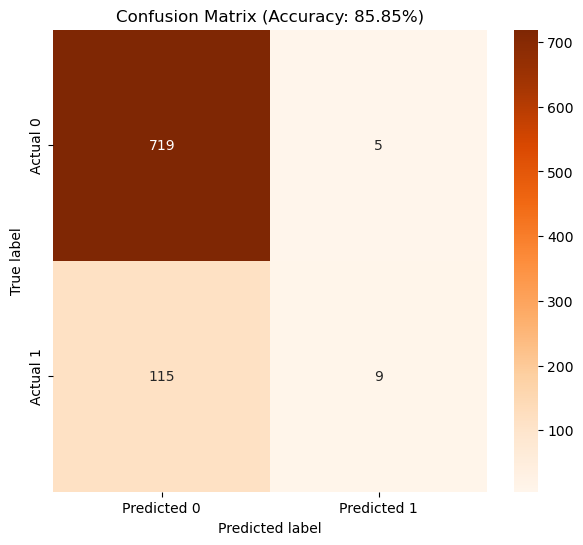

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy * 100:.2f}%)')
plt.show()